Consider the following problem:

- Data: US COVID Cases data
- Goal: Given the initial values of COVID, find an SIR model that models future cases pretty well.
- Idea: use dynamical systems and optimize coefficients.


### Info:

- Goal is to look for beta and gamma values that optimize the data


In [2]:
# Read the data:
import pandas as pd
import numpy as np

df = pd.read_csv("cleaning_csv/cleaned_output.csv")

x = df["date"].values
y_data = df["hospital_onset_covid"].values

t_data = np.linspace(1, len(x), num=len(x))

Ok, so we have:

- $dS/dt = -beta * S * I$
- $dI/dt = beta * S * I - gamma * I$
- $dR/dt = gamma * I$

and we have data for dS/dt, so we want to optimize it.


beta_opt = 1
gamma_opt = 1
[ 1.00000000e+01  1.10363846e+08  4.06005927e+07 ... -3.27436036e-19
 -3.27295380e-19 -3.27154723e-19]


C:\Users\lin3232\AppData\Local\Temp\ipykernel_11512\3021797363.py:46: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, cov = curve_fit(infected, t_data, infected_integral)


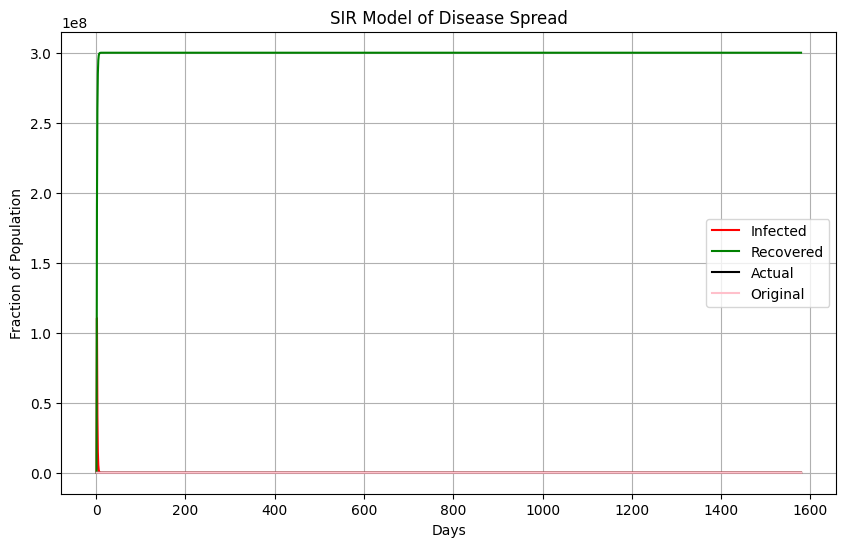

In [22]:
#import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Step 1: create a function that returns our derivatives
# When you have multiple functions (x, y) to solve for, define z = [x, y]
# Solving for z(t). However, we are looking for beta and gamma (see above)
def model(z, t, beta, gamma):
    # z = [S, I, R]
    dSdt = - beta * z[0] * z[1]
    dIdt = beta * z[0] * z[1] - gamma * z[1]
    dRdt = gamma * z[1]
    
    # Return the derivatives:
    dzdt = [dSdt, dIdt, dRdt]
    return dzdt


# The function z in terms of beta and gamma
# Adding in some initial value
def z(t, beta, gamma, z0):
    # Solution (z) to  z'(t) = model(t,y,beta, gamma) 
    #   with initial condition z(0) = y0
    z_info = odeint(model, z0, t, args=(beta, gamma))

    # Note that args tells us what we can plug in:
    return z_info.ravel()
    # I have no idea what .ravel() does

# Function to get the infected portion of the population of z
def infected(t, beta, gamma):
    # Setting a value for z0 to see if that fixes stuff

    temp = z(t, beta, gamma, [300000000, 10, 0])
    return temp[1]

infected_integral = []
for i in range(len(y_data)):
    infected_integral.append(
        sum( y_data[(max(i-10, 0)):i] )
    )
# This is just a check to see if I can solve this. This is not correct but still
#   popt, cov = curve_fit(infected, t_data, y_data, [-1.2, 0.1, 1000,1,1])

popt, cov = curve_fit(infected, t_data, infected_integral)

beta_opt, gamma_opt = popt

print("beta_opt = %g" % beta_opt)
print("gamma_opt = %g" % gamma_opt)


#print("y0 = %g" % y0_opt)

solution = odeint(model, [300000000, 10, 0], t_data, args=(beta_opt, gamma_opt))
S, I, R = solution.T
print(I)


# Plot the results
plt.figure(figsize=(10, 6))
#plt.plot(t_data, S, label='Susceptible', color='blue')
plt.plot(t_data, I, label='Infected', color='red')
plt.plot(t_data, R, label='Recovered', color='green')
plt.plot(t_data, infected_integral, label='Actual', color='Black')
plt.plot(t_data, y_data, label='Original', color='pink')

plt.xlabel('Days')
plt.ylabel('Fraction of Population')
plt.title('SIR Model of Disease Spread')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# ChatGPT Code:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Initial conditions
N = 1000  # Total population
I0 = 1     # Initial number of infected individuals
S0 = N - I0  # Initial number of susceptible individuals
R0 = 0     # Initial number of recovered individuals

beta = 0.3  # Infection rate
gamma = 0.1 # Recovery rate

# Time grid (in days)
t = np.linspace(0, 160, 160)

# Solve the differential equations
solution = odeint(sir_model, [S0/N, I0/N, R0/N], t, args=(beta, gamma))
S, I, R = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color='blue')
plt.plot(t, I, label='Infected', color='red')
plt.plot(t, R, label='Recovered', color='green')
plt.xlabel('Days')
plt.ylabel('Fraction of Population')
plt.title('SIR Model of Disease Spread')
plt.legend()
plt.grid()
plt.show()
